In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
import keras 


In [10]:
fashion_mnist = tf.keras.datasets.fashion_mnist 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [11]:
X_train.shape , y_train.shape, X_test.shape , y_test.shape 

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [13]:
y_train[0]

np.uint8(9)

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

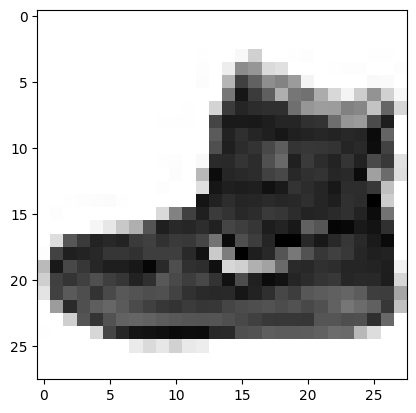

In [15]:
plt.imshow(X_train[0], cmap='Greys') 

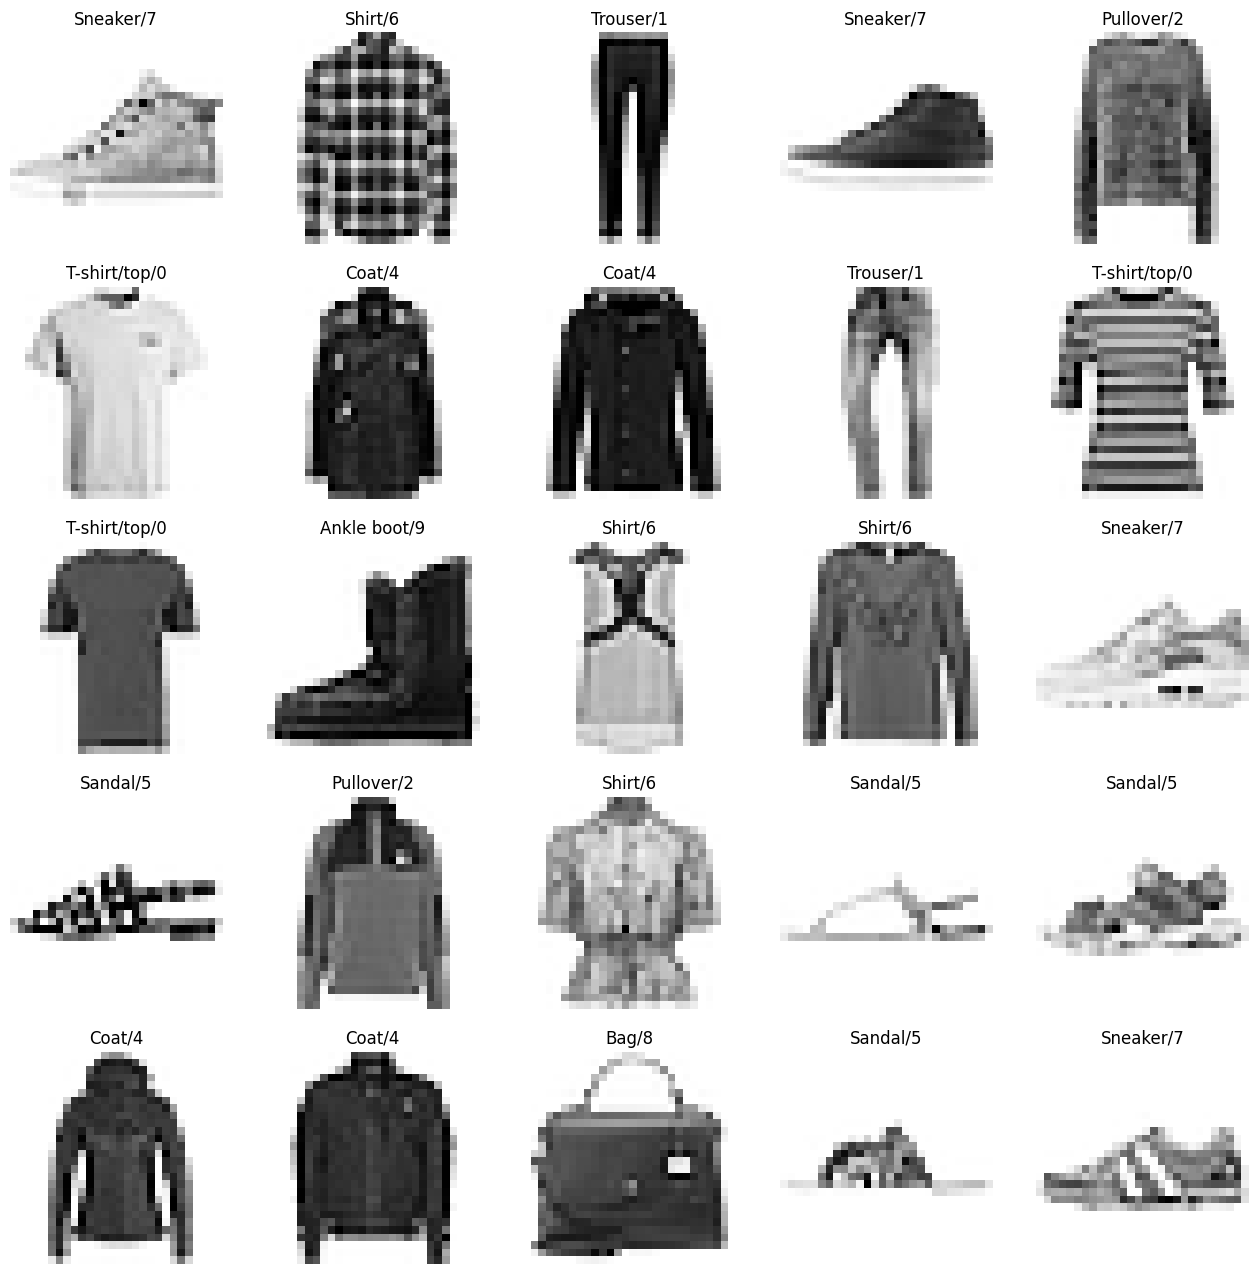

In [17]:
plt.figure(figsize = (16,16)) 
j=1 
for i in np.random.randint(0, 1000, 25): 
    plt.subplot(5,5,j) 
    j+=1 
    plt.imshow(X_train[i], cmap='Greys') 
    plt.axis('off') 
    plt.title('{}/{}'.format(class_names[y_train[i]], y_train[i]))

In [18]:
X_train.shape

(60000, 28, 28)

In [19]:
X_train.ndim

3

In [20]:
X_train = np.expand_dims(X_train, -1) 
X_test = np.expand_dims(X_test, -1) 

In [21]:
X_train.ndim

4

In [22]:
X_train = X_train/255 
X_test = X_test/255 

In [23]:
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state=2020)

In [24]:
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

In [34]:
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(28, 28, 1)),  # Input shape for grayscale images
    keras.layers.MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),  # Another Conv2D layer with more filters
    keras.layers.MaxPooling2D(pool_size=(2, 2)),  # Another max pooling layer
    keras.layers.Flatten(),  # Flatten the output for the dense layer
    keras.layers.Dense(units=128, activation='relu'),  # Fully connected layer
    keras.layers.Dense(units=10, activation='softmax')  # Output layer with 10 categories (Fashion-MNIST)
])

# Model summary to check the layers and parameters
cnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
cnn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - accuracy: 0.6082 - loss: 1.1858 - val_accuracy: 0.8021 - val_loss: 0.5347
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.8274 - loss: 0.4808 - val_accuracy: 0.8509 - val_loss: 0.4199
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.8512 - loss: 0.4129 - val_accuracy: 0.8653 - val_loss: 0.3778
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.8680 - loss: 0.3685 - val_accuracy: 0.8702 - val_loss: 0.3624
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - accuracy: 0.8758 - loss: 0.3432 - val_accuracy: 0.8762 - val_loss: 0.3496
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 142ms/step - accuracy: 0.8853 - loss: 0.3229 - val_accuracy: 0.8819 - val_loss: 0.3261
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step - accuracy: 0.8914 - loss: 0.3017 - val_accuracy: 0.8861 - val_loss: 0.3190
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 142ms/step - accuracy: 0.8969 - loss: 0.2894 - val_accu

In [37]:
y_pred = cnn_model.predict(X_test) 
y_pred.round(2) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.25, 0.18, 0.  ]], dtype=float32)

In [38]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [39]:
cnn_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8911 - loss: 0.3114


[0.3037607967853546, 0.892799973487854]

In [41]:
plt.figure(figsize=(16,30)) 
 
j=1 
for i in np.random.randint(0, 1000,60): 
    plt.subplot(10,6, j); j+=1 
    plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys') 
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_names[y_test[i]], y_test[i], class_names[np.argmax(y_pred[i])],np.argm 
    plt.axis('off') 

SyntaxError: '(' was never closed (4063274566.py, line 7)

In [ ]:
from sklearn.metrics import confusion_matrix 
 
plt.figure(figsize=(16,9)) 
y_pred_labels = [ np.argmax(label) for label in y_pred ] 
cm = confusion_matrix(y_test, y_pred_labels) 
 
# show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names) 


In [ ]:
from sklearn.metrics import classification_report 
cr= classification_report(y_test, y_pred_labels, target_names=class_names) 
print(cr) 